In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "CSVs/AccidentsInjuriesCamerasSummary"
summary_df = pd.read_csv(file)
file2 = "CSVs/Crashes_w_Region.csv"
crashes_df = pd.read_csv(file2)
summary_df
file3 = "CSVs/Congestion.csv"
congestion_df = pd.read_csv(file3)
file4 = "CSVs/Chicago_Traffic_Tracker_-_Congestion_Estimates_by_Regions.csv"
regions_df = pd.read_csv(file4)

In [3]:
regions_df.columns

Index(['REGION', ' REGION_ID', ' WEST', ' EAST', ' SOUTH', ' NORTH',
       ' DESCRIPTION', ' CURRENT_SPEED', ' LAST_UPDATED'],
      dtype='object')

In [4]:
congestion_df = congestion_df.rename(columns={"REGION_ID" : "Region ID"})
summaryfull_df = pd.merge(summary_df, congestion_df, on = "Region ID", how = "left")

del summaryfull_df["BUS COUNT"]
del summaryfull_df["NUMBER OF READS"]
del summaryfull_df["SPEED"]
del summaryfull_df["Unnamed: 0"]

regions_df = regions_df.rename(columns={" REGION_ID" : "Region ID"})
summaryfull_df = pd.merge(summaryfull_df, regions_df, on = "Region ID", how = "left")

del summaryfull_df[" WEST"]
del summaryfull_df[" EAST"]
del summaryfull_df[" SOUTH"]
del summaryfull_df[" NORTH"]
del summaryfull_df[" DESCRIPTION"]
del summaryfull_df[" CURRENT_SPEED"]
del summaryfull_df[" LAST_UPDATED"]
summaryfull_df

,Region ID,Accidents,Injuries,Fatalities,Speed Cameras,Red Light Cameras,Total Cameras,Accidents Per Camera,Injuries Per Camera,Fatalities Per Camera,Injuries Per Accident,Fatalities Per Accident,congestion,REGION
0,1,5106,538.0,0.0,1.0,2.0,3.0,1702.000000,179.333333,0.000000,0.105366,0.000000,51.643062,Rogers Park - West Ridge
1,2,7593,1165.0,3.0,7.0,7.0,14.0,542.357143,83.214286,0.214286,0.153431,0.000395,39.112871,Far North West
2,3,10364,1388.0,5.0,10.0,10.0,20.0,518.200000,69.400000,0.250000,0.133925,0.000482,50.981392,North Park-Albany-Linconl Sq
3,4,5864,736.0,4.0,3.0,5.0,8.0,733.000000,92.000000,0.500000,0.125512,0.000682,54.117083,Edge Water-Uptown
4,5,12253,1834.0,7.0,16.0,15.0,31.0,395.258065,59.161290,0.225806,0.149678,0.000571,48.046807,Dunning-Portage-Belmont Cragn
5,6,9638,1326.0,5.0,10.0,13.0,23.0,419.043478,57.652174,0.217391,0.137580,0.000519,51.880135,Irving Park-Avondale-North Ctr
6,7,9184,1487.0,3.0,3.0,15.0,18.0,510.222222,82.611111,0.166667,0.161912,0.000327,53.041770,Hermosa-Logan Square
7,8,11375,1529.0,5.0,8.0,8.0,16.0,710.937500,95.562500,0.312500,0.134418,0.000440,54.490629,Lincoln Park-Lake View
8,9,5991,1266.0,5.0,3.0,3.0,6.0,998.500000,211.000000,0.833333,0.211317,0.000835,47.325716,Austin
9,10,12704,3398.0,25.0,14.0,10.0,24.0,529.333333,141.583333,1.041667,0.267475,0.001968,51.527209,Humboldt-Garfield Prk E/W


In [5]:
summaryfull_df["congestion"] = summaryfull_df["congestion"]/100
summaryfull_df["Accidents Scaled"] = summaryfull_df["Accidents"]/summaryfull_df["congestion"]
summaryfull_df["Injuries Scaled"] = summaryfull_df["Injuries"]/summaryfull_df["congestion"]
summaryfull_df["Fatalities Scaled"] = summaryfull_df["Fatalities"]/summaryfull_df["congestion"]
summaryfull_df

,Region ID,Accidents,Injuries,Fatalities,Speed Cameras,Red Light Cameras,Total Cameras,Accidents Per Camera,Injuries Per Camera,Fatalities Per Camera,Injuries Per Accident,Fatalities Per Accident,congestion,REGION,Accidents Scaled,Injuries Scaled,Fatalities Scaled
0,1,5106,538.0,0.0,1.0,2.0,3.0,1702.000000,179.333333,0.000000,0.105366,0.000000,0.516431,Rogers Park - West Ridge,9887.097797,1041.766278,0.000000
1,2,7593,1165.0,3.0,7.0,7.0,14.0,542.357143,83.214286,0.214286,0.153431,0.000395,0.391129,Far North West,19413.046724,2978.559125,7.670109
2,3,10364,1388.0,5.0,10.0,10.0,20.0,518.200000,69.400000,0.250000,0.133925,0.000482,0.509814,North Park-Albany-Linconl Sq,20328.985750,2722.561966,9.807500
3,4,5864,736.0,4.0,3.0,5.0,8.0,733.000000,92.000000,0.500000,0.125512,0.000682,0.541171,Edge Water-Uptown,10835.765169,1360.014182,7.391381
4,5,12253,1834.0,7.0,16.0,15.0,31.0,395.258065,59.161290,0.225806,0.149678,0.000571,0.480468,Dunning-Portage-Belmont Cragn,25502.214933,3817.111090,14.569126
5,6,9638,1326.0,5.0,10.0,13.0,23.0,419.043478,57.652174,0.217391,0.137580,0.000519,0.518801,Irving Park-Avondale-North Ctr,18577.438087,2555.891565,9.637600
6,7,9184,1487.0,3.0,3.0,15.0,18.0,510.222222,82.611111,0.166667,0.161912,0.000327,0.530418,Hermosa-Logan Square,17314.655939,2803.450934,5.655920
7,8,11375,1529.0,5.0,8.0,8.0,16.0,710.937500,95.562500,0.312500,0.134418,0.000440,0.544906,Lincoln Park-Lake View,20875.149151,2805.987082,9.175890
8,9,5991,1266.0,5.0,3.0,3.0,6.0,998.500000,211.000000,0.833333,0.211317,0.000835,0.473257,Austin,12659.079418,2675.078375,10.565080
9,10,12704,3398.0,25.0,14.0,10.0,24.0,529.333333,141.583333,1.041667,0.267475,0.001968,0.515272,Humboldt-Garfield Prk E/W,24654.934996,6594.574080,48.518055


In [6]:
congestion_df.columns

Index(['Unnamed: 0', 'Region ID', 'BUS COUNT', 'NUMBER OF READS', 'SPEED',
       'congestion'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x2834818cbe0>,
 [Text(-0.9848870883265696, 0.4898953186626833, 'Accidents'),
  Text(0.9835625539785391, -0.49254918780890666, 'Injuries'),
  Text(1.099996001162493, -0.0029660456039730426, 'Fatalities')],
 [Text(-0.5372111390872197, 0.2672156283614636, '85.31%'),
  Text(0.5364886658064758, -0.2686631933503127, '14.61%'),
  Text(0.5999978188159052, -0.0016178430567125686, '0.09%')])

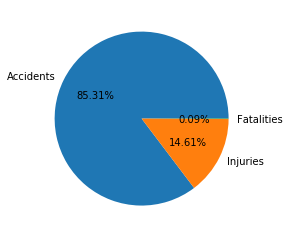

In [27]:
plt.pie([summary_df["Accidents"].sum(), summary_df["Injuries"].sum(), summary_df["Fatalities"].sum()], labels = labels, autopct = '%.2f%%')

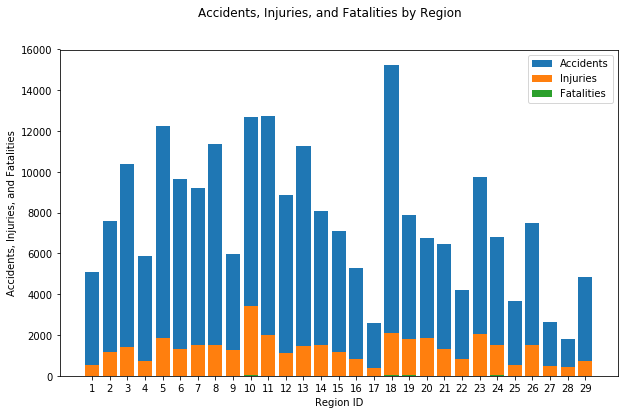

In [33]:
fig, ax = plt.subplots(figsize = (10,6))
labels = ["Accidents", "Injuries", "Fatalities"]
ax.bar(summary_df["Region ID"], summary_df["Accidents"])
ax.bar(summary_df["Region ID"], summary_df["Injuries"])
ax.bar(summary_df["Region ID"], summary_df["Fatalities"])
fig.suptitle("Accidents, Injuries, and Fatalities by Region")
plt.xticks(summary_df["Region ID"])
plt.ylabel("Accidents, Injuries, and Fatalities")
plt.xlabel("Region ID")
plt.legend(loc = "best", labels = labels)

averageaccidents = summary_df["Accidents"].mean()
averageinjuries = summary_df["Injuries"].mean()
averagefatalities = summary_df["Fatalities Per Accident"].mean()
#plt.hlines(averageaccidents, 0, 30, alpha=.90, linestyle = "--", color = "blue")
#plt.hlines(averageinjuries, 0, 30, alpha=.90, linestyle = "--", color = "orange")
plt.savefig("Images/Accidents_by_Region")

In [8]:
summaryfull_df.columns

Index(['Region ID', 'Accidents', 'Injuries', 'Fatalities', 'Speed Cameras',
       'Red Light Cameras', 'Total Cameras', 'Accidents Per Camera',
       'Injuries Per Camera', 'Fatalities Per Camera', 'Injuries Per Accident',
       'Fatalities Per Accident', 'congestion', 'REGION', 'Accidents Scaled',
       'Injuries Scaled', 'Fatalities Scaled'],
      dtype='object')

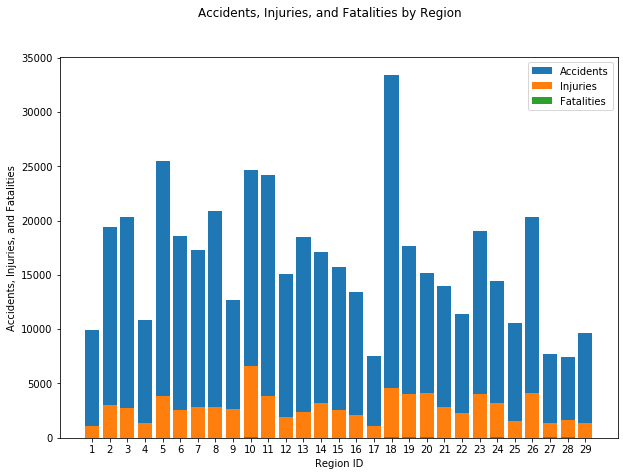

In [9]:
fig, ax = plt.subplots(figsize = (10, 7))
labels = ["Accidents", "Injuries", "Fatalities"]
ax.bar(summaryfull_df["Region ID"], summaryfull_df["Accidents Scaled"])
ax.bar(summaryfull_df["Region ID"], summaryfull_df["Injuries Scaled"])
ax.bar(summaryfull_df["Region ID"], summaryfull_df["Fatalities Scaled"])
fig.suptitle("Accidents, Injuries, and Fatalities by Region")
plt.xticks(summary_df["Region ID"])
plt.ylabel("Accidents, Injuries, and Fatalities")
plt.xlabel("Region ID")
plt.legend(loc = "best", labels = labels)

#averageaccidents = summary_df["Accidents Scaled"].mean()
#averageinjuries = summary_df["Injuries Scaled"].mean()
#averagefatalities = summary_df["Fatalities Scaled"].mean()
#plt.hlines(averageaccidents, 0, 30, alpha=.90, linestyle = "--", color = "blue")
#plt.hlines(averageinjuries, 0, 30, alpha=.90, linestyle = "--", color = "orange")
#plt.savefig("Images/Accidents_by_Region_Scaled")

0.1733812063569644

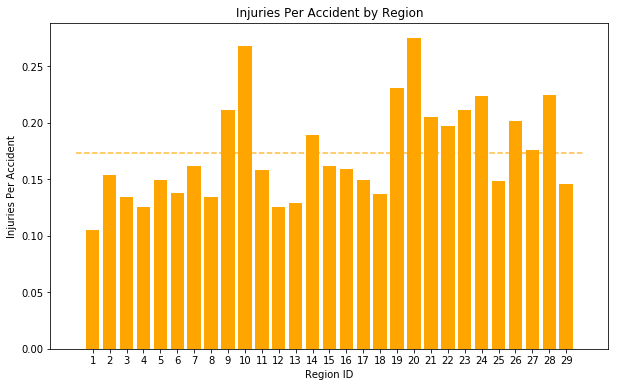

In [25]:
plt.subplots(figsize = (10, 6))
plt.bar(summary_df["Region ID"], summary_df["Injuries Per Accident"], color = "orange")
plt.xticks(summary_df["Region ID"])
plt.xlabel("Region ID")
plt.ylabel("Injuries Per Accident")
plt.title("Injuries Per Accident by Region")
plt.hlines(summary_df["Injuries Per Accident"].mean(), 0, 30, alpha=.75, linestyle = "--", color = "orange")

plt.savefig("Images/Injuries_Per_Accident_by_Region")




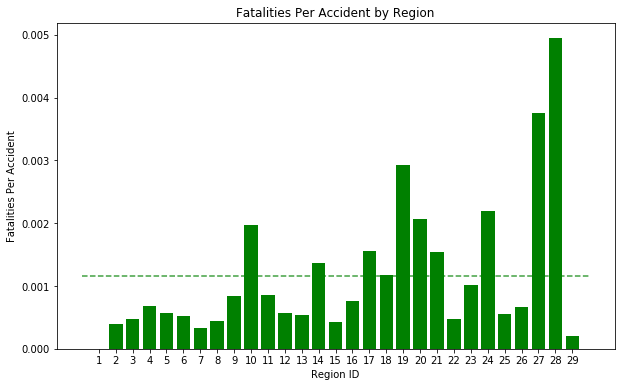

In [11]:

fig, ax = plt.subplots(figsize = (10, 6))
plt.bar(summary_df["Region ID"], summary_df["Fatalities Per Accident"], color = "green")
plt.xticks(summary_df["Region ID"])
plt.xlabel("Region ID")
plt.ylabel("Fatalities Per Accident")
plt.title("Fatalities Per Accident by Region")
plt.hlines(summary_df["Fatalities Per Accident"].mean(), 0, 30, alpha=.75, linestyle = "--", color = "green")
plt.savefig("Images/Fatalities_Per_Accident_by_Region")

In [12]:
summary_df["IA/C"] = summary_df["Injuries Per Accident"]/summary_df["Total Cameras"]
summary_df["FA/C"] = summary_df["Fatalities Per Accident"]/summary_df["Total Cameras"]


In [13]:
percamera = summary_df[["Region ID", "Accidents Per Camera", "Injuries Per Camera", "Fatalities Per Camera"]]
percamera = percamera[percamera["Region ID"] != 17]
percamera

,Region ID,Accidents Per Camera,Injuries Per Camera,Fatalities Per Camera
0,1,1702.000000,179.333333,0.000000
1,2,542.357143,83.214286,0.214286
2,3,518.200000,69.400000,0.250000
3,4,733.000000,92.000000,0.500000
4,5,395.258065,59.161290,0.225806
5,6,419.043478,57.652174,0.217391
6,7,510.222222,82.611111,0.166667
7,8,710.937500,95.562500,0.312500
8,9,998.500000,211.000000,0.833333
9,10,529.333333,141.583333,1.041667


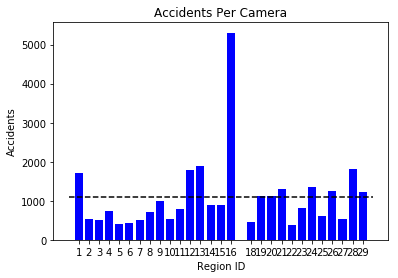

In [14]:
regions = percamera["Region ID"]

percamera.set_index("Region ID")
fig, ax = plt.subplots()
plt.bar(percamera["Region ID"], percamera["Accidents Per Camera"], color = "blue")
plt.title("Accidents Per Camera")
plt.ylabel("Accidents")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((percamera["Accidents Per Camera"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/AccidentsPerCamera.png")

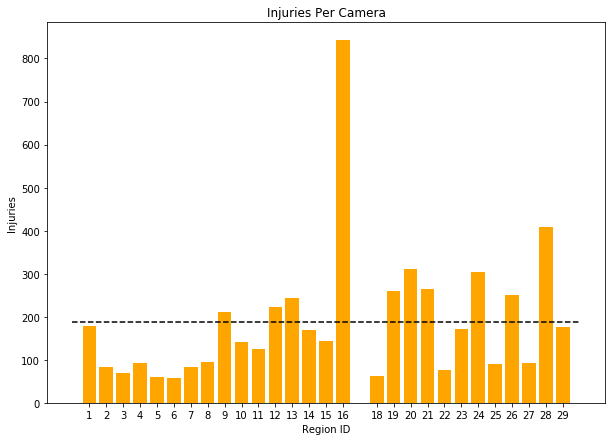

In [15]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(percamera["Region ID"], percamera["Injuries Per Camera"], color = "orange")
plt.title("Injuries Per Camera")
plt.ylabel("Injuries")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((percamera["Injuries Per Camera"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/InjuriesPerCamera.png")

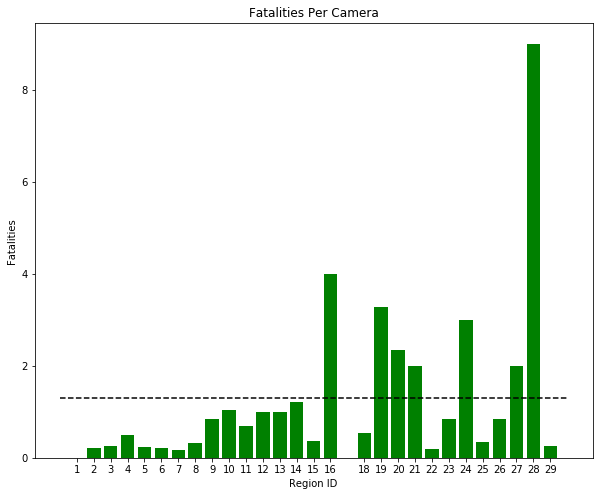

In [16]:
plt.subplots(figsize = (10,8))
plt.bar(percamera["Region ID"], percamera["Fatalities Per Camera"], color = "green")
plt.title("Fatalities Per Camera")
plt.ylabel("Fatalities")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((percamera["Fatalities Per Camera"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/FatalitiesPerCamera.png")

-0.13106524415236243 -0.2478356200575027
0.49796578793609847 0.19488500908531609


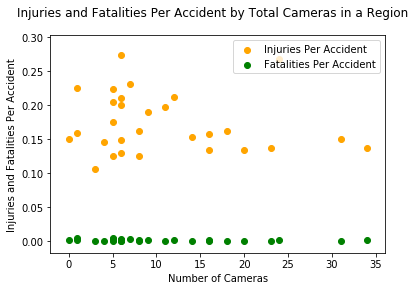

In [31]:
fig, ax = plt.subplots()
ax.scatter(summary_df["Total Cameras"], summary_df["Injuries Per Accident"], color = "orange")
ax.scatter(summary_df["Total Cameras"], summary_df["Fatalities Per Accident"], color = "green")
fig.suptitle("Injuries and Fatalities Per Accident by Total Cameras in a Region")
plt.ylabel("Injuries and Fatalities Per Accident")
plt.xlabel("Number of Cameras")
plt.legend(loc = "best")

slope, intercept, r, p, q = stats.linregress(summary_df["Total Cameras"], summary_df["Injuries Per Accident"])
slope2, intercept2, r2, p2, q2 = stats.linregress(summary_df["Total Cameras"], summary_df["Fatalities Per Accident"])                                

line1 = (slope * summary_df["Total Cameras"] + intercept)
line2 = (slope2 * summary_df["Total Cameras"] + intercept2)

#plt.plot(summary_df["Total Cameras"], line1, color = "orange", linestyle = "--")
#plt.plot(summary_df["Total Cameras"], line2, color = "green", linestyle = "--")
print(r, r2)
print(p, p2)

plt.savefig("Images/InjuriesFatalitiesbyCameras")

-0.13106524415236243 -0.2478356200575027
0.49796578793609847 0.19488500908531609


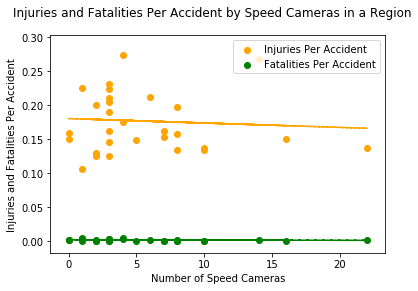

In [18]:
fig, ax = plt.subplots()
ax.scatter(summary_df["Speed Cameras"], summary_df["Injuries Per Accident"], color = "orange")
ax.scatter(summary_df["Speed Cameras"], summary_df["Fatalities Per Accident"], color = "green")
fig.suptitle("Injuries and Fatalities Per Accident by Speed Cameras in a Region")
plt.ylabel("Injuries and Fatalities Per Accident")
plt.xlabel("Number of Speed Cameras")
plt.legend(loc = "best")
(slope, intercept, r, p, __) = stats.linregress(summary_df["Total Cameras"], summary_df["Injuries Per Accident"])
(slope2, intercept2, r2, p2, __) = stats.linregress(summary_df["Total Cameras"], summary_df["Fatalities Per Accident"])                                

line1 = (slope * summary_df["Speed Cameras"] + intercept)
line2 = (slope2 * summary_df["Speed Cameras"] + intercept2)

plt.plot(summary_df["Speed Cameras"], line1, color = "orange", linestyle = "--")
plt.plot(summary_df["Speed Cameras"], line2, color = "green", linestyle = "--")
print(r, r2)
print(p, p2)

plt.savefig("Images/InjuriesFatalitiesSpeedCameras.png")

-0.18458218512409 -0.31402171414898156
0.3377841892436859 0.09712771117818499


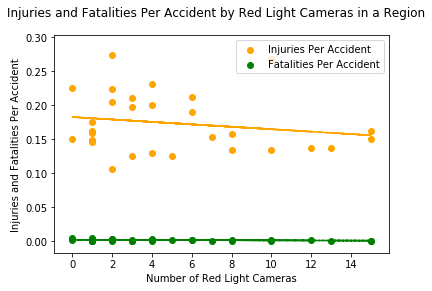

In [19]:
fig, ax = plt.subplots()
ax.scatter(summary_df["Red Light Cameras"], summary_df["Injuries Per Accident"], color = "orange")
ax.scatter(summary_df["Red Light Cameras"], summary_df["Fatalities Per Accident"], color = "green")
fig.suptitle("Injuries and Fatalities Per Accident by Red Light Cameras in a Region")
plt.ylabel("Injuries and Fatalities Per Accident")
plt.xlabel("Number of Red Light Cameras")
plt.legend(loc = "best")

(slope, intercept, r, p, __) = stats.linregress(summary_df["Red Light Cameras"], summary_df["Injuries Per Accident"])
(slope2, intercept2, r2, p2, __) = stats.linregress(summary_df["Red Light Cameras"], summary_df["Fatalities Per Accident"])                                

line1 = (slope * (summary_df["Red Light Cameras"]) + intercept)
line2 = (slope2 * (summary_df["Red Light Cameras"]) + intercept2)

plt.plot(summary_df["Red Light Cameras"], line1, color = "orange", linestyle = "--")
plt.plot(summary_df["Red Light Cameras"], line2, color = "green", linestyle = "--")
print(r, r2)
print(p, p2)
plt.savefig("Images/InjuresFatalitiesRedLight.png")

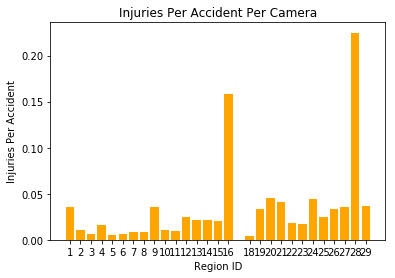

In [20]:


plt.bar(summary_df["Region ID"], summary_df["IA/C"], color = "orange")
plt.title("Injuries Per Accident Per Camera")
plt.ylabel("Injuries Per Accident")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((summary_df["IA/C"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/InjuriesPerAccidentPerCamera.png")



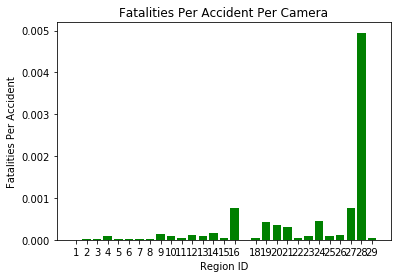

In [21]:
fig, ax = plt.subplots()
plt.bar(summary_df["Region ID"], summary_df["FA/C"], color = "green")
plt.title("Fatalities Per Accident Per Camera")
plt.ylabel("Fatalities Per Accident")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((summary_df["FA/C"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/FatalitiesPerAccidentPerCamera.png")

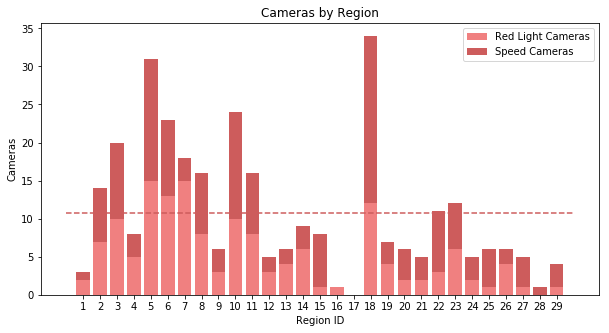

In [44]:
 x = summary_df["Region ID"]
y1 = summary_df["Red Light Cameras"]
y2 = summary_df["Speed Cameras"]

p1, p2 = plt.subplots(figsize=(10, 5))

p1 = plt.bar(x, y1, color = "lightcoral")
p2 = plt.bar(x, y2, bottom=y1, color = "indianred")

plt.ylabel('Cameras')
plt.xlabel('Region ID')
plt.title('Cameras by Region')
plt.xticks(x)
plt.legend((p1[0], p2[0]), ('Red Light Cameras', 'Speed Cameras'))
plt.hlines(summary_df["Total Cameras"].mean(), 0, 30, linestyle = "--", color = "indianred")

plt.savefig("Cameras_by_Region")


10.689655172413794


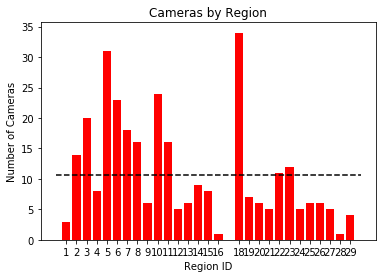

In [32]:
plt.bar(summary_df["Region ID"], summary_df["Total Cameras"], color = "red")
plt.title("Cameras by Region")
plt.ylabel("Number of Cameras")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((summary_df["Total Cameras"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/TotalCamerasBar.png")
print(summary_df["Total Cameras"].mean())

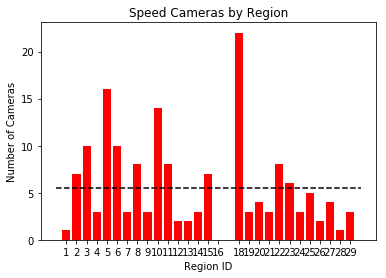

In [23]:
plt.bar(summary_df["Region ID"], summary_df["Speed Cameras"], color = "red")
plt.title("Speed Cameras by Region")
plt.ylabel("Number of Cameras")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((summary_df["Speed Cameras"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/SpeedCamerasBar.png")

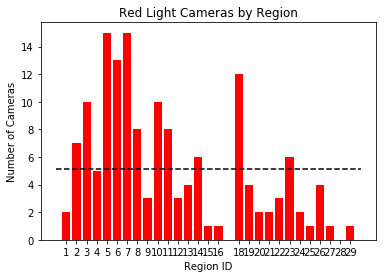

In [24]:
plt.bar(summary_df["Region ID"], summary_df["Red Light Cameras"], color = "red")
plt.title("Red Light Cameras by Region")
plt.ylabel("Number of Cameras")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((summary_df["Red Light Cameras"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/RedlightCamerasBar.png")

In [25]:
summaryfull_df.columns
summaryfull_df.rename(columns={"REGION" : "Region Name"})

,Region ID,Accidents,Injuries,Fatalities,Speed Cameras,Red Light Cameras,Total Cameras,Accidents Per Camera,Injuries Per Camera,Fatalities Per Camera,Injuries Per Accident,Fatalities Per Accident,congestion,Region Name,Accidents Scaled,Injuries Scaled,Fatalities Scaled
0,1,5106,538.0,0.0,1.0,2.0,3.0,1702.000000,179.333333,0.000000,0.105366,0.000000,0.516431,Rogers Park - West Ridge,9887.097797,1041.766278,0.000000
1,2,7593,1165.0,3.0,7.0,7.0,14.0,542.357143,83.214286,0.214286,0.153431,0.000395,0.391129,Far North West,19413.046724,2978.559125,7.670109
2,3,10364,1388.0,5.0,10.0,10.0,20.0,518.200000,69.400000,0.250000,0.133925,0.000482,0.509814,North Park-Albany-Linconl Sq,20328.985750,2722.561966,9.807500
3,4,5864,736.0,4.0,3.0,5.0,8.0,733.000000,92.000000,0.500000,0.125512,0.000682,0.541171,Edge Water-Uptown,10835.765169,1360.014182,7.391381
4,5,12253,1834.0,7.0,16.0,15.0,31.0,395.258065,59.161290,0.225806,0.149678,0.000571,0.480468,Dunning-Portage-Belmont Cragn,25502.214933,3817.111090,14.569126
5,6,9638,1326.0,5.0,10.0,13.0,23.0,419.043478,57.652174,0.217391,0.137580,0.000519,0.518801,Irving Park-Avondale-North Ctr,18577.438087,2555.891565,9.637600
6,7,9184,1487.0,3.0,3.0,15.0,18.0,510.222222,82.611111,0.166667,0.161912,0.000327,0.530418,Hermosa-Logan Square,17314.655939,2803.450934,5.655920
7,8,11375,1529.0,5.0,8.0,8.0,16.0,710.937500,95.562500,0.312500,0.134418,0.000440,0.544906,Lincoln Park-Lake View,20875.149151,2805.987082,9.175890
8,9,5991,1266.0,5.0,3.0,3.0,6.0,998.500000,211.000000,0.833333,0.211317,0.000835,0.473257,Austin,12659.079418,2675.078375,10.565080
9,10,12704,3398.0,25.0,14.0,10.0,24.0,529.333333,141.583333,1.041667,0.267475,0.001968,0.515272,Humboldt-Garfield Prk E/W,24654.934996,6594.574080,48.518055


In [27]:
limited_df = summaryfull_df[["Region ID", "REGION", "Injuries Per Accident", "Fatalities Per Accident", "Red Light Cameras", "Speed Cameras"]]
limited_df

,Region ID,REGION,Injuries Per Accident,Fatalities Per Accident,Red Light Cameras,Speed Cameras
0,1,Rogers Park - West Ridge,0.105366,0.000000,2.0,1.0
1,2,Far North West,0.153431,0.000395,7.0,7.0
2,3,North Park-Albany-Linconl Sq,0.133925,0.000482,10.0,10.0
3,4,Edge Water-Uptown,0.125512,0.000682,5.0,3.0
4,5,Dunning-Portage-Belmont Cragn,0.149678,0.000571,15.0,16.0
5,6,Irving Park-Avondale-North Ctr,0.137580,0.000519,13.0,10.0
6,7,Hermosa-Logan Square,0.161912,0.000327,15.0,3.0
7,8,Lincoln Park-Lake View,0.134418,0.000440,8.0,8.0
8,9,Austin,0.211317,0.000835,3.0,3.0
9,10,Humboldt-Garfield Prk E/W,0.267475,0.001968,10.0,14.0


In [30]:
limited_df.iloc[[0, 9, 19, 27], :]

,Region ID,REGION,Injuries Per Accident,Fatalities Per Accident,Red Light Cameras,Speed Cameras
0,1,Rogers Park - West Ridge,0.105366,0.000000,2.0,1.0
9,10,Humboldt-Garfield Prk E/W,0.267475,0.001968,10.0,14.0
19,20,Fuller-Grand Blvd-Washington Park,0.274672,0.002065,2.0,4.0
27,28,Riverdale-Hegewisch,0.224849,0.004948,0.0,1.0


In [31]:
regions_df

,REGION,Region ID,WEST,EAST,SOUTH,NORTH,DESCRIPTION,CURRENT_SPEED,LAST_UPDATED
0,Austin,9,-87.775947,-87.747456,41.866129,41.909269,Roosevelt to North Ave. Austin to Cicero,23.86,2019-03-22 14:31:33.0
1,Near South-Douglas,16,-87.636322,-87.597952,41.822792,41.866129,Pershing to Roosevelt. Stewart to Lake Shore,23.86,2019-03-22 14:31:33.0
2,Rogers Park - West Ridge,1,-87.709645,-87.654561,41.997946,42.026444,North of Devon. Kedzie to Lake Shore,22.57,2019-03-22 14:31:33.0
3,West Town-Near West,11,-87.691617,-87.647208,41.866129,41.910561,Roosevelt to North. Rockwell to Halsted,20.45,2019-03-22 14:31:33.0
4,Hermosa-Logan Square,7,-87.747456,-87.674590,41.909269,41.931841,North Ave to Diversy. Cicero to Ravenswood,20.45,2019-03-22 14:31:33.0
5,South Deering-East Side,27,-87.584845,-87.524436,41.677477,41.728472,119th to 91st. Stony Island to State Line,30.68,2019-03-22 14:31:33.0
6,Midway-Garfield Rdg-Clearing,17,-87.802188,-87.747456,41.764066,41.822792,71st to Pershing. Halem to Cicero,29.32,2019-03-22 14:31:33.0
7,South West Side,18,-87.747456,-87.683730,41.764066,41.822792,71st to Pershing. Cicero to Western,23.86,2019-03-22 14:31:33.0
8,Downtown Lakefront,29,-87.623080,-87.595378,41.866129,41.911401,Roosevelt to Oak. Michigan to Lake Shore,21.82,2019-03-22 14:31:33.0
9,Hyde Park-Kenwood-Woodlawn,21,-87.606334,-87.566260,41.764066,41.822792,71st to Pershing. Cottage Grove to Lake Shore,22.50,2019-03-22 14:31:33.0
